In [25]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

In [26]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): 
        if labels == 'glacier': 
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resizing image
            Images.append(image)
            Labels.append(label)
    return shuffle(Images,Labels,random_state=817328462) #Shuffling the dataset

In [27]:
def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

In [28]:
Images, Labels = get_images('/home/sacg/DSI/Capstone_2/data2/seg_train/seg_train/') #Extract the training images from the folders

In [29]:
Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [30]:
Images.shape, Labels.shape

((14034, 150, 150, 3), (14034,))

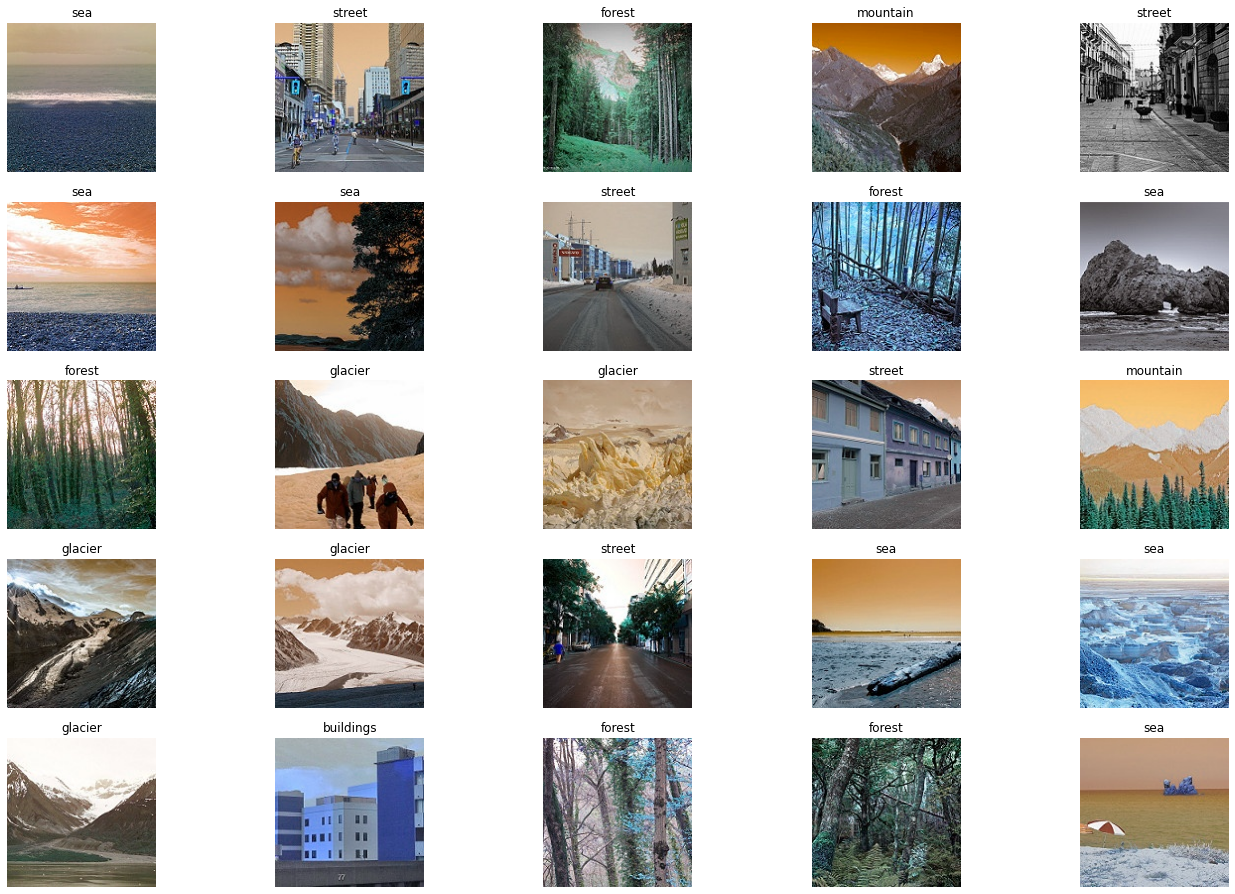

In [31]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 21, 21, 50)       

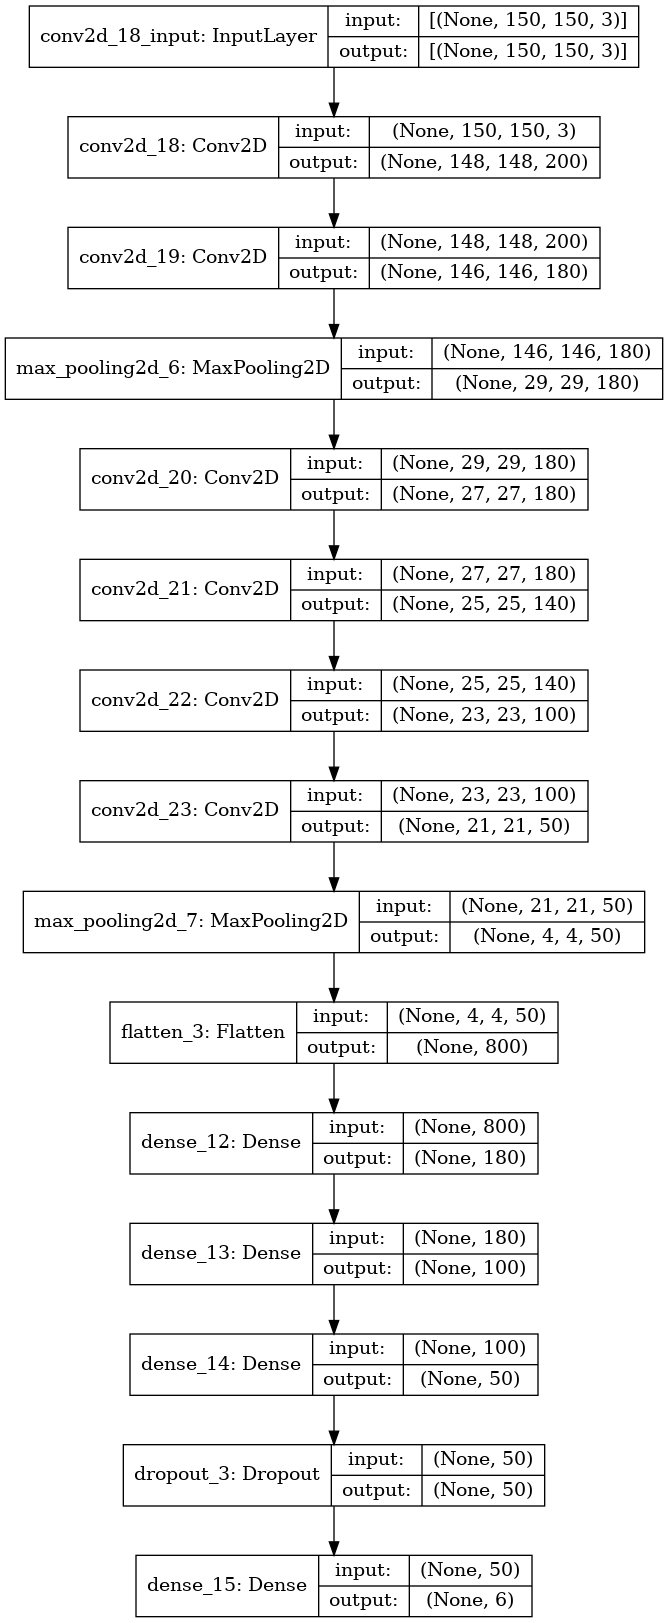

In [32]:


model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
model.save('/home/sacg/DSI/Capstone_2/models')
Utils.plot_model(model,to_file='model.png',show_shapes=True)



In [34]:
model.layers, len(model.layers)


([<tensorflow.python.keras.layers.convolutional.Conv2D at 0x7ff528437670>,
 14)

In [9]:
trained = model.fit(Images,Labels,epochs=35,validation_split=0.30)

Epoch 1/35
307/307 [==============================] - 845s 3s/step - loss: 1.4901 - accuracy: 0.4051 - val_loss: 1.1016 - val_accuracy: 0.5773
Epoch 2/35
307/307 [==============================] - 939s 3s/step - loss: 1.1649 - accuracy: 0.5474 - val_loss: 0.9141 - val_accuracy: 0.6701
Epoch 3/35
307/307 [==============================] - 937s 3s/step - loss: 1.0431 - accuracy: 0.6060 - val_loss: 0.8592 - val_accuracy: 0.6972
Epoch 4/35
307/307 [==============================] - 939s 3s/step - loss: 0.9415 - accuracy: 0.6475 - val_loss: 0.7792 - val_accuracy: 0.7257
Epoch 5/35
307/307 [==============================] - 938s 3s/step - loss: 0.8630 - accuracy: 0.6858 - val_loss: 0.7513 - val_accuracy: 0.7279
Epoch 6/35
307/307 [==============================] - 940s 3s/step - loss: 0.7817 - accuracy: 0.7174 - val_loss: 0.6357 - val_accuracy: 0.7737
Epoch 7/35
307/307 [==============================] - 940s 3s/step - loss: 0.7224 - accuracy: 0.7484 - val_loss: 0.6026 - val_accuracy: 0.7948

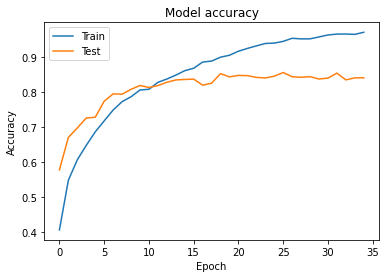

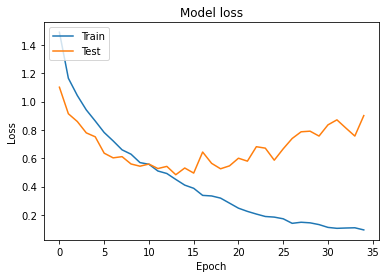

In [19]:


plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()



In [24]:

loaded_model = 
test_images,test_labels = get_images('data2/seg_test/seg_test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)



94/94 [==============================] - 50s 535ms/step - loss: 2.4250 - accuracy: 0.0450


[2.424996852874756, 0.04500000178813934]

In [22]:


pred_images,no_labels = get_images('data2/seg_pred/')
pred_images = np.array(pred_images)
pred_images.shape



(7301, 150, 150, 3)

/home/sacg/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
<ipython-input-23-c36def35925b>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


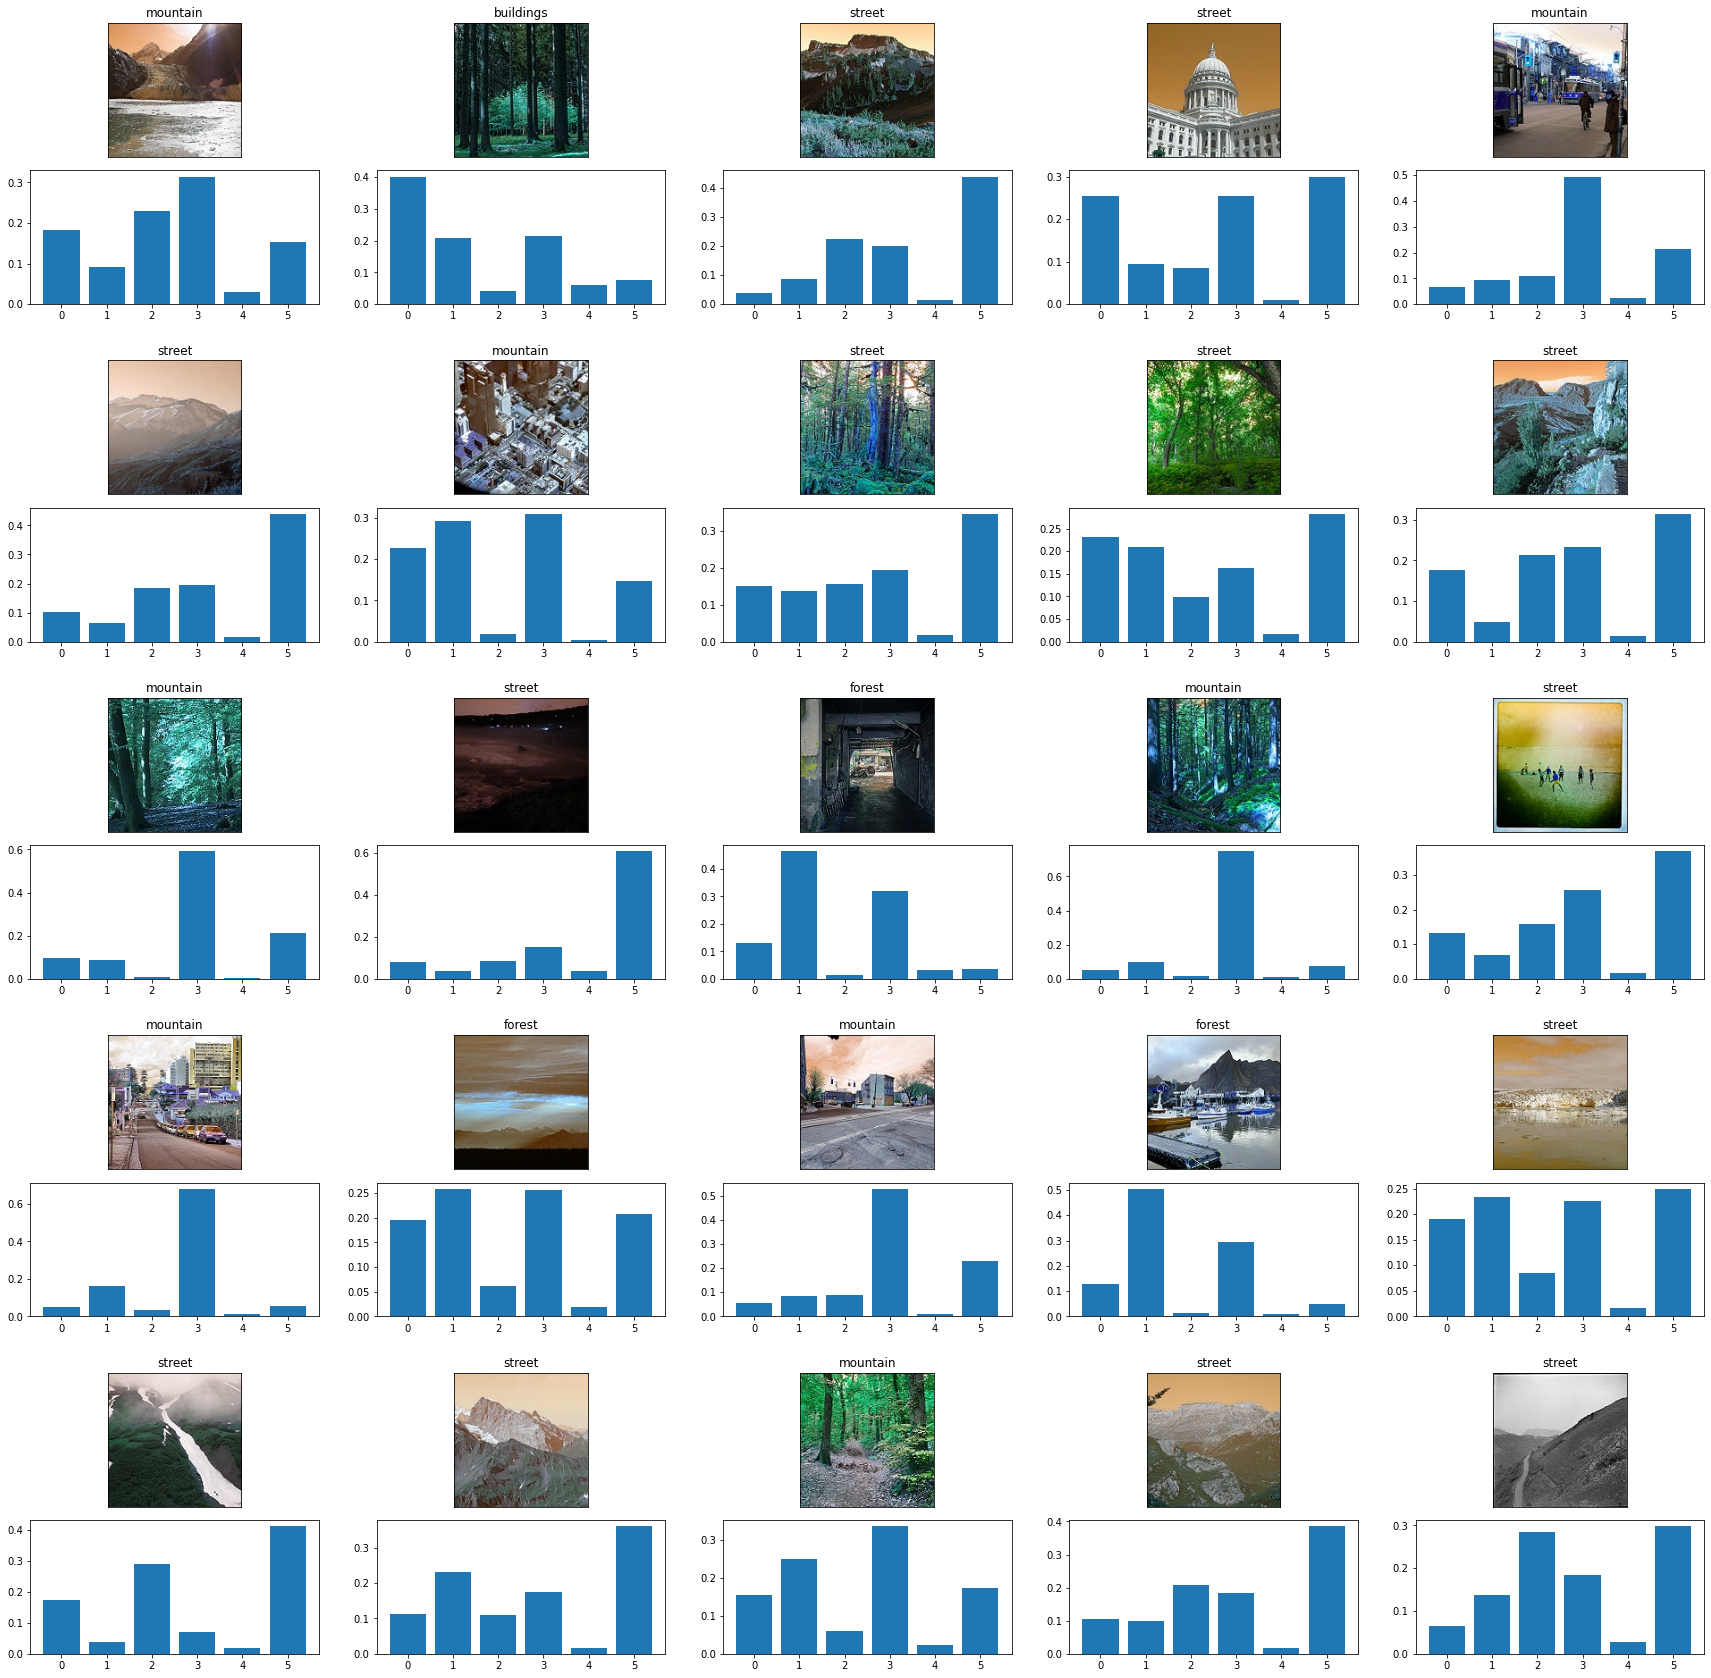

In [23]:


fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = get_classlabel(model.predict_classes(pred_image)[0])
    pred_prob = model.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


fig.show()

